### Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml
#our neural network
from neuralnetwork import Network,FCLayer,ActivationLayer,sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,binary_cross_entropy,binary_cross_entropy_prime,relu,relu_prime
import time
#sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
import itertools
from imblearn.over_sampling import RandomOverSampler
import random
from neuralnetwork import Network,FCLayer,ActivationLayer
from neuralnetwork import sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,softmax,softmax_prime


### Data

In [2]:
# loading the data
congress = pd.read_csv('data/CongressionalVotingID.shuf.lrn.csv')

In [3]:
congress.head(5)

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,249,republican,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,140,democrat,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
2,383,democrat,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
3,201,democrat,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
4,297,republican,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y


In [4]:
#Counting the number of samples for each class
print("Number of samples that belong to republican: ", str(len(congress[congress['class']=='republican'])),len(congress[congress['class']=='republican'])/len(congress), '%')
print("Number of samples that belong to democrat: ", str(len(congress[congress['class']=='democrat'])),len(congress[congress['class']=='democrat'])/len(congress), '%')

Number of samples that belong to republican:  81 0.37155963302752293 %
Number of samples that belong to democrat:  137 0.6284403669724771 %


##### Preparing the data

In [5]:
congress['class'] = congress['class'].map({'democrat': 1, 'republican': 0})

In [6]:
X = congress.drop(['class','ID'], axis=1)
Y = congress['class']

In [7]:
from sklearn.preprocessing import LabelEncoder

# Perform integer encoding
label_encoder = LabelEncoder()
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])
X = X.to_numpy()

encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
Y = encoder.fit_transform(y_reshaped)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

#splitting into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state = 1234)


### Our Neural Network Implementation

#### Rectified Linear function in the hidden layers & Sigmoid Function in the outer layers

Since the sigmoid function must be used in the output layer when  building a binary classifier, we used relu in the hidden layers.


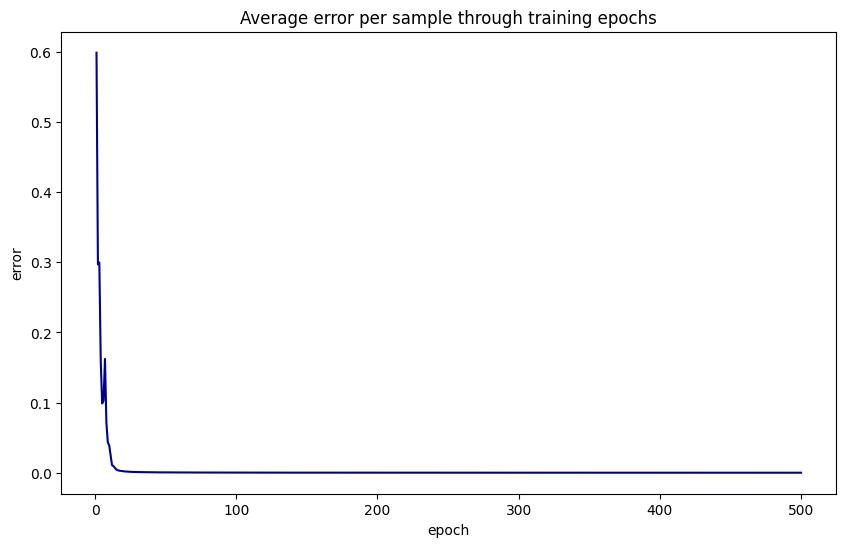

In [9]:
seed = 1234
# network with 2 layers
net = Network()
net.add(FCLayer(16, 10,seed =  1234))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10,2,seed = 1234))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.8888888888888888
##################################################
Balanced Accuracy on train:  1.0
Balanced Accuracy on test:  0.9166666666666667
##################################################
Recall on train:  1.0
Recall on test:  0.8333333333333334
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


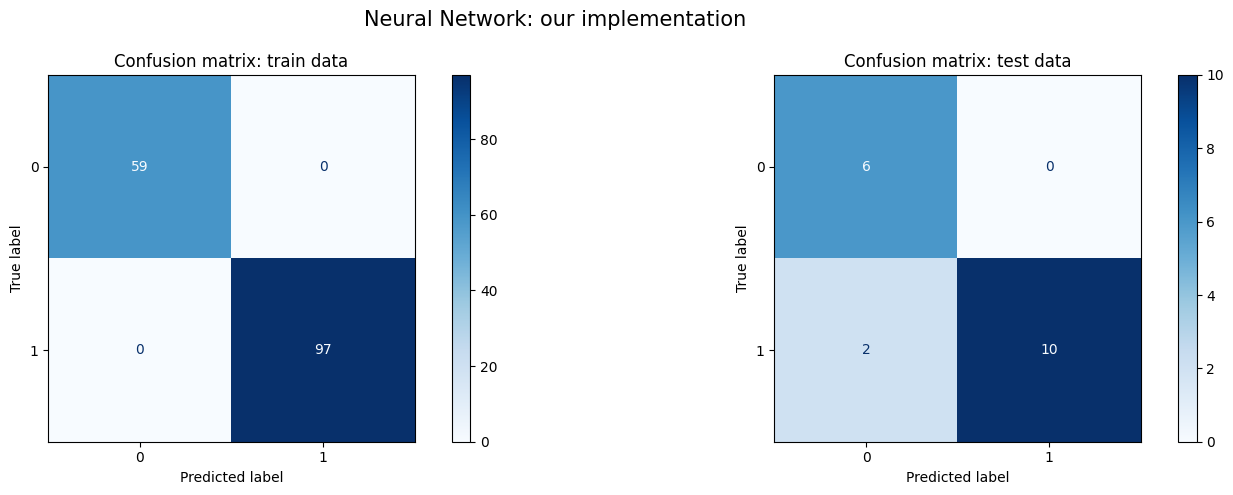

In [136]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

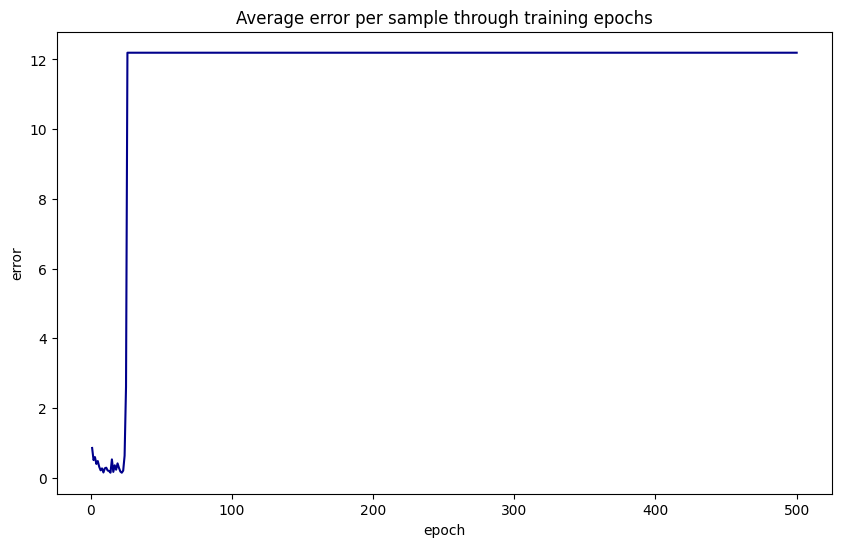

In [10]:
# network with 3 layers
net = Network()
net.add(FCLayer(16, 10,seed = seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 10,seed= seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10,2,seed = seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  0.6217948717948718
Accuracy on test:  0.6666666666666666
##################################################
Balanced Accuracy on train:  0.5
Balanced Accuracy on test:  0.5
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  0.6217948717948718
Precision on test:  0.6666666666666666
##################################################


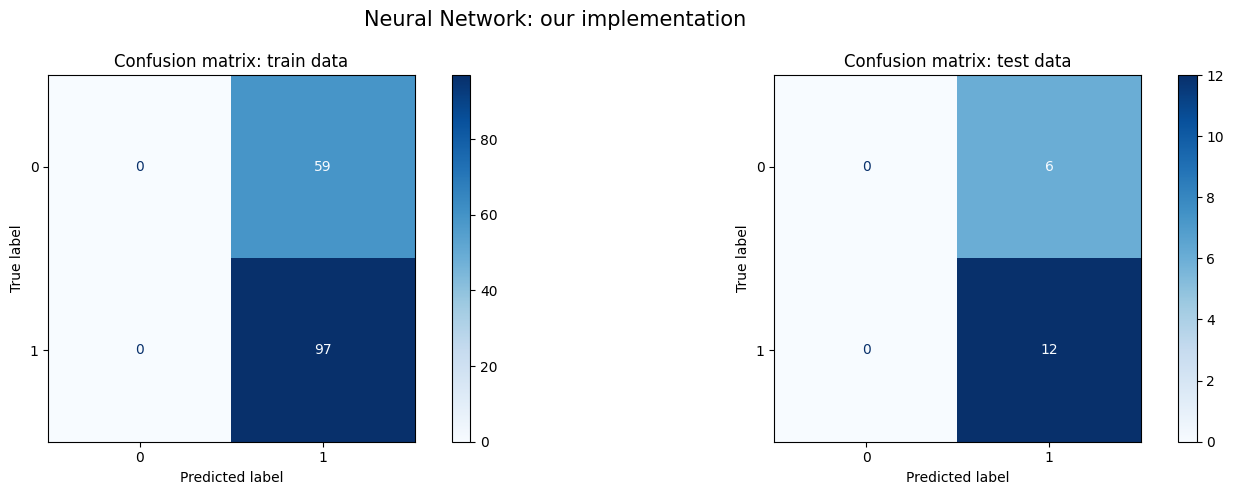

In [138]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

### Sigmoid activation function in the outer layer only

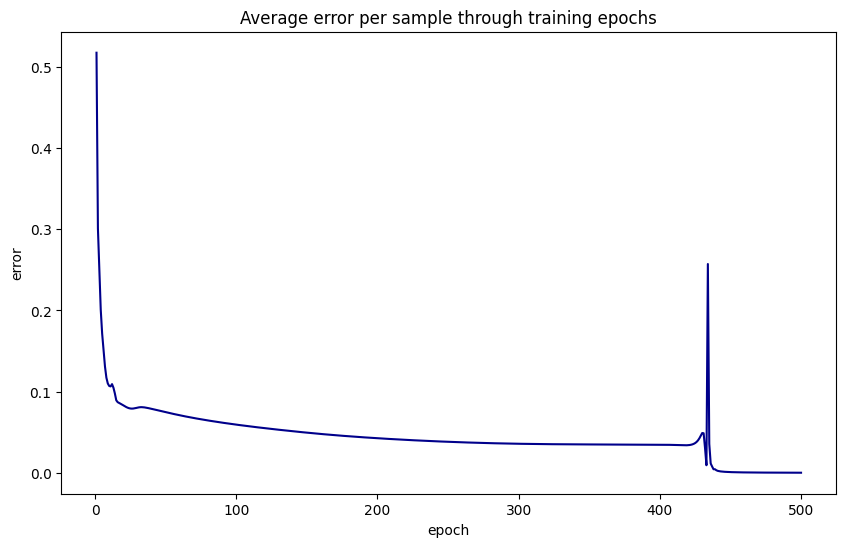

In [139]:
# network with 2 layers
net = Network()
net.add(FCLayer(16, 10,seed =  1234))  
net.add(FCLayer(10,2,seed = 1234))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.8888888888888888
##################################################
Balanced Accuracy on train:  1.0
Balanced Accuracy on test:  0.9166666666666667
##################################################
Recall on train:  1.0
Recall on test:  0.8333333333333334
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


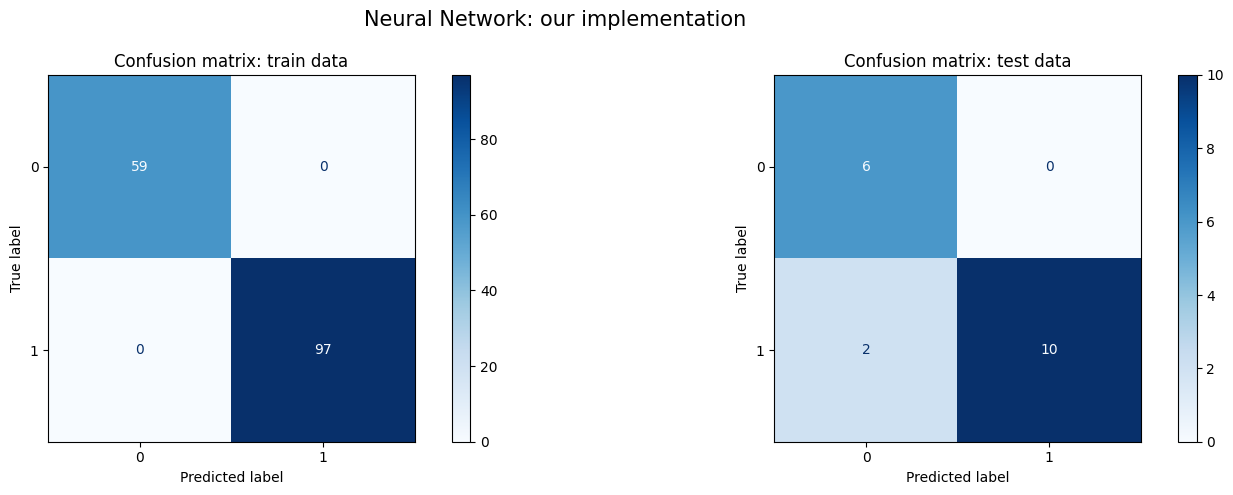

In [140]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:317: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


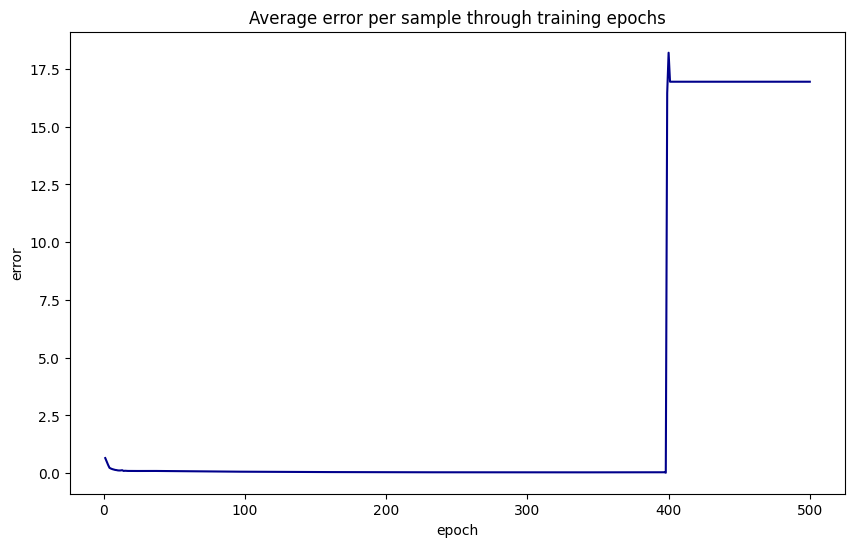

In [141]:
# network with 3 layers
net = Network()
net.add(FCLayer(16, 10,seed =  seed))  
net.add(FCLayer(10,10,seed = seed))
net.add(FCLayer(10,2,seed = seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  0.4551282051282051
Accuracy on test:  0.5
##################################################
Balanced Accuracy on train:  0.5618556701030928
Balanced Accuracy on test:  0.625
##################################################
Recall on train:  0.12371134020618557
Recall on test:  0.25
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


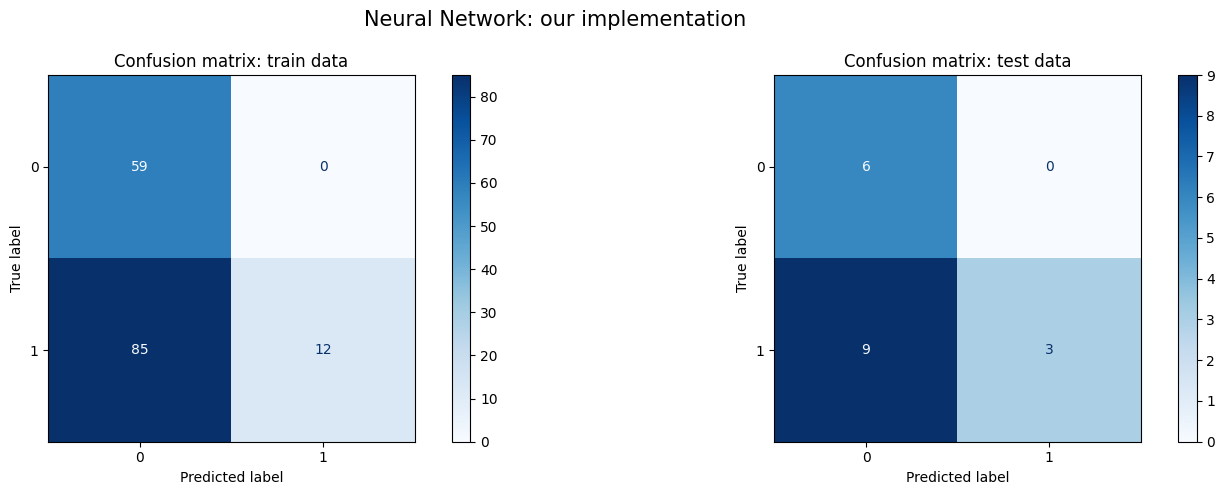

In [142]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

### Regularization with Ridge

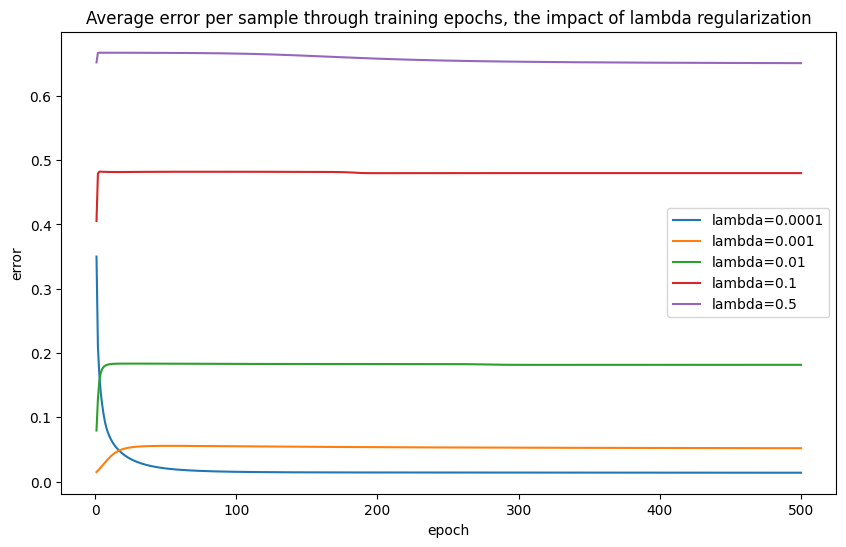

In [12]:
seed = 1234
net = Network()
net.add(FCLayer(16, 10,seed=seed))  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(10, 2, seed=seed))  
net.add(ActivationLayer(softmax, softmax_prime))

plt.figure(figsize=(10, 6))
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('Average error per sample through training epochs, the impact of lambda regularization')

lambda_vect = np.array([0.0001, 0.001, 0.01, 0.1, 0.5])
k = len(lambda_vect)

for i in range(0, k):
    # print(i)
    # train
    net.use(categorical_cross_entropy, categorical_cross_entropy_prime)
    l = lambda_vect[i]
    err_vect = net.fit_plus_ridge(X_train, y_train, epochs=500, learning_rate=0.1, reg_lambda = l)

    plt.plot(np.arange(1, len(err_vect)+1, 1), err_vect, '-', label='lambda='+str(l))
    
plt.legend()
plt.show()


The train error plot is highly influenced by the value of the lambda parameter. As seen below, when lambda is too low, the regularization effect is very minimal and the training error shows a decreasing tendence. Moreover, the blue plot (lambda = 0.0001) is quite similar to our other initial plots above due to lambda being almost 0. On the other side, as lambda increases, the training error also increases and the model may be prone to underfitting.

### Randomized search with CV to find the best parameter combination

In [20]:
#parameter grid
params = {
    'hidden_layer_size': [2,3,4,5,6],
    'activation': ['relu+sigmoid','sigmoid'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.5],
    'reg_lambda': [0,0.0001, 0.001, 0.01, 0.1, 0.5],
    'epochs': [200, 500,700,1000],
    'node_numbers' : [5,10,15]
}

input_size = 16
output_size = 2
accuracy_dict = {}
best_accuracy = 0
best_parms = {}
seed = 1234

In [21]:
start = time.time()
random.seed(seed)
#we are going to perform randomized search for 10 randomly chosen parameter combinations
for i in range(10):
    layers = random.sample(params['hidden_layer_size'], 1)[0]
    activation = random.sample(params['activation'], 1)[0]
    learning_rate = random.sample(params['learning_rate'], 1)[0]
    nodes = random.sample(params['node_numbers'], 1)[0]
    epochs = random.sample(params['epochs'], 1)[0]
    reg_lambda =  random.sample(params['reg_lambda'], 1)[0]

    kf = KFold(n_splits=5, shuffle=True,random_state = seed)
    accuracy_scores = []
    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Initialize and train your neural network with the current hyperparameters
        net = Network()
        net.add(FCLayer(input_size, nodes,seed = seed))
        if activation == 'sigmoid':
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
        else:
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
                net.add(ActivationLayer(relu, relu_prime))
        net.add(FCLayer(nodes, output_size,seed = seed))
        net.add(ActivationLayer(sigmoid, sigmoid_prime))
        net.use(binary_cross_entropy, binary_cross_entropy_prime)

        
        net.fit_plus_ridge(X_train_fold, y_train_fold, epochs=epochs, learning_rate=learning_rate,reg_lambda = reg_lambda)
        y_val_pred = net.predict(X_val_fold)
        y_val_pred = np.concatenate(y_val_pred)

        # Convert one-hot encoded predictions back to class labels
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        y_val_labels = np.argmax(y_val_fold, axis=1)

        accuracy = accuracy_score(y_val_labels,y_val_pred_labels)
        
        avg_accuracy = np.mean(accuracy)
        accuracy_scores.append(avg_accuracy)
        if avg_accuracy > best_accuracy:
                    best_accuracy = avg_accuracy
                    best_params = {
                        'hidden_layer_size': layers,
                        'number_of_nodes':nodes,
                        'activation': activation,
                        'learning_rate': learning_rate,
                        'reg_lambda':reg_lambda,
                        'epochs':epochs}
    
    accuracy_dict[(layers,activation,nodes,learning_rate,reg_lambda,epochs)] = accuracy_scores

end = time.time()

/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:388: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:388: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:388: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:388: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:388: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:388: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnet

In [22]:
print("Time needed to run cross validation for best number of layers and nodes "+ str((end-start)/60)+ " minutes.")


Time needed to run cross validation for best number of layers and nodes 10.348443138599396 minutes.


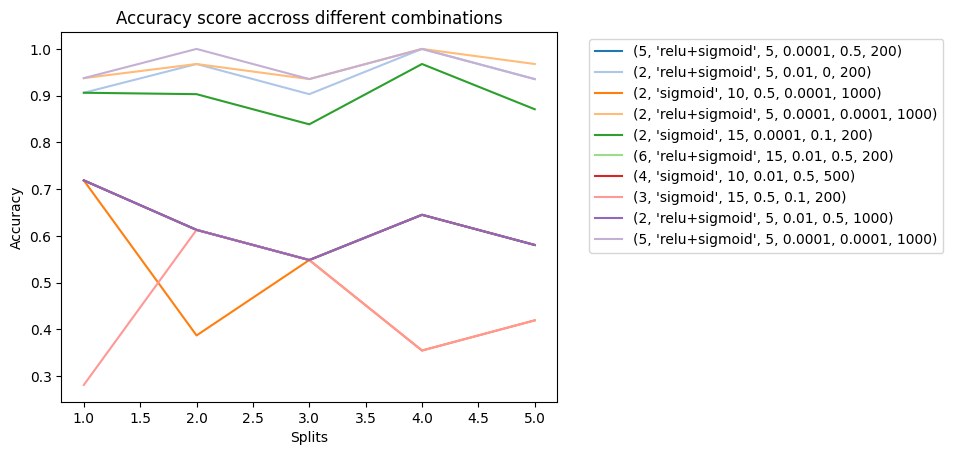

In [25]:
cmap = plt.get_cmap('tab20')
for i,c in enumerate(accuracy_dict):
   color = cmap(i)
   plt.plot(np.arange(1, len(accuracy_dict[c])+1, 1), accuracy_dict[c], '-', label=str(c),color = color)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Accuracy score accross different combinations")
plt.ylabel('Accuracy')
plt.xlabel('Splits')
plt.show()

In [26]:
print(f'The highest accuracy of {best_accuracy} was achieved with the following parameters:\n {best_params}')

The highest accuracy of 1.0 was achieved with the following parameters:
 {'hidden_layer_size': 2, 'number_of_nodes': 5, 'activation': 'relu+sigmoid', 'learning_rate': 0.01, 'reg_lambda': 0, 'epochs': 200}


#### Testing the best model on test set

In [15]:
net = Network()
net.add(FCLayer(16, 5,seed =  seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5,5,seed = seed))
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5,5,seed = seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5,5,seed = seed)) 
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(5,2,seed = seed)) 
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=200, learning_rate=0.001)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.9545454545454546
##################################################
Balanced Accuracy on train:  1.0
Balanced Accuracy on test:  0.9642857142857143
##################################################
Recall on train:  1.0
Recall on test:  0.9285714285714286
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


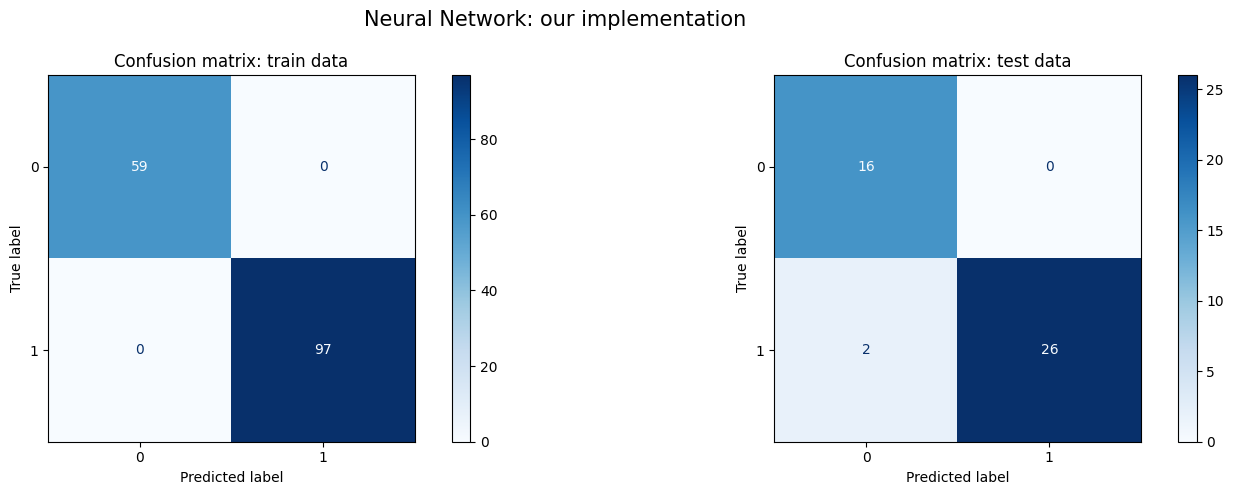

In [16]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=200, learning_rate=0.001)